## *Web scraping imdb movies*

## *By: Krishna Aryal*

## **1. Opening html file from local file system**

In [19]:
from bs4 import BeautifulSoup
import requests

try:
    source = requests.get('https://www.imdb.com/chart/top/')
    source.raise_for_status() # if there is any error in link it shows error
    soup =BeautifulSoup(source.text,'html.parser')
    #print(soup)
except Exception as e:
    print(e)

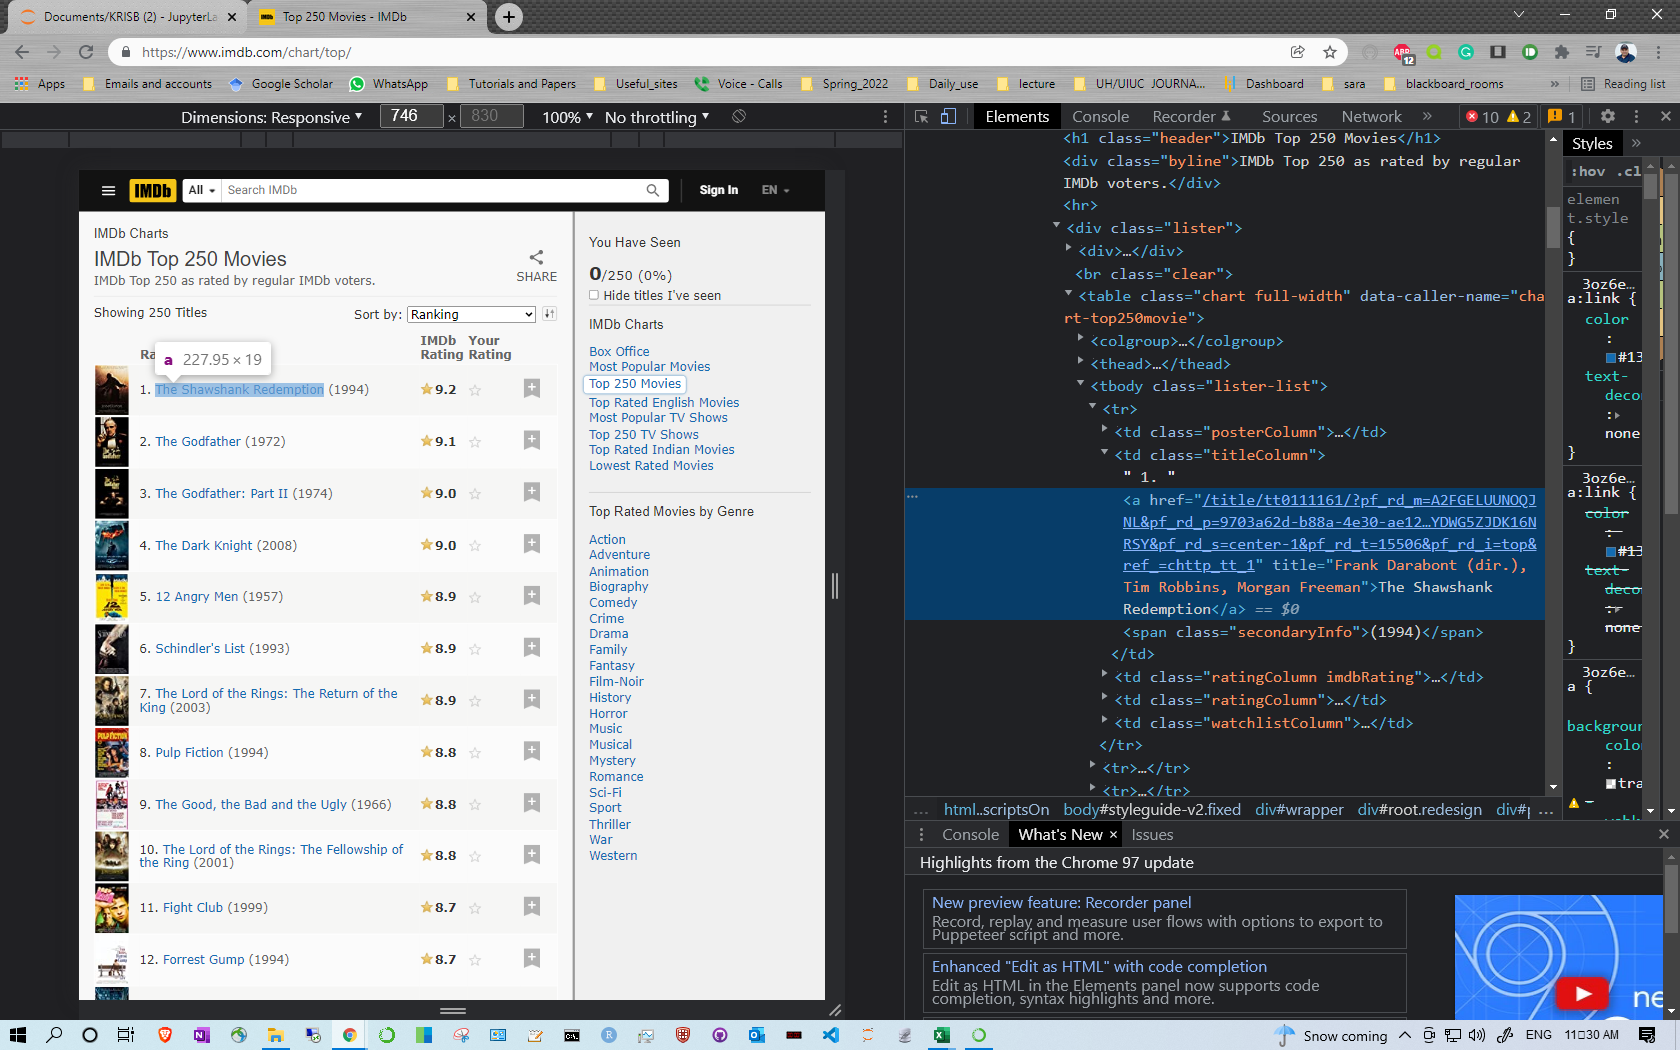

In [20]:
from IPython.display import Image
Image(filename='moviename_tag.png')

Movie name in above image is located inside <a </a> tag. There are attributes href, title etc.

-- <a </a> tag is inside </td> tag.

-- <td </td> tag is inside <tr > tag.

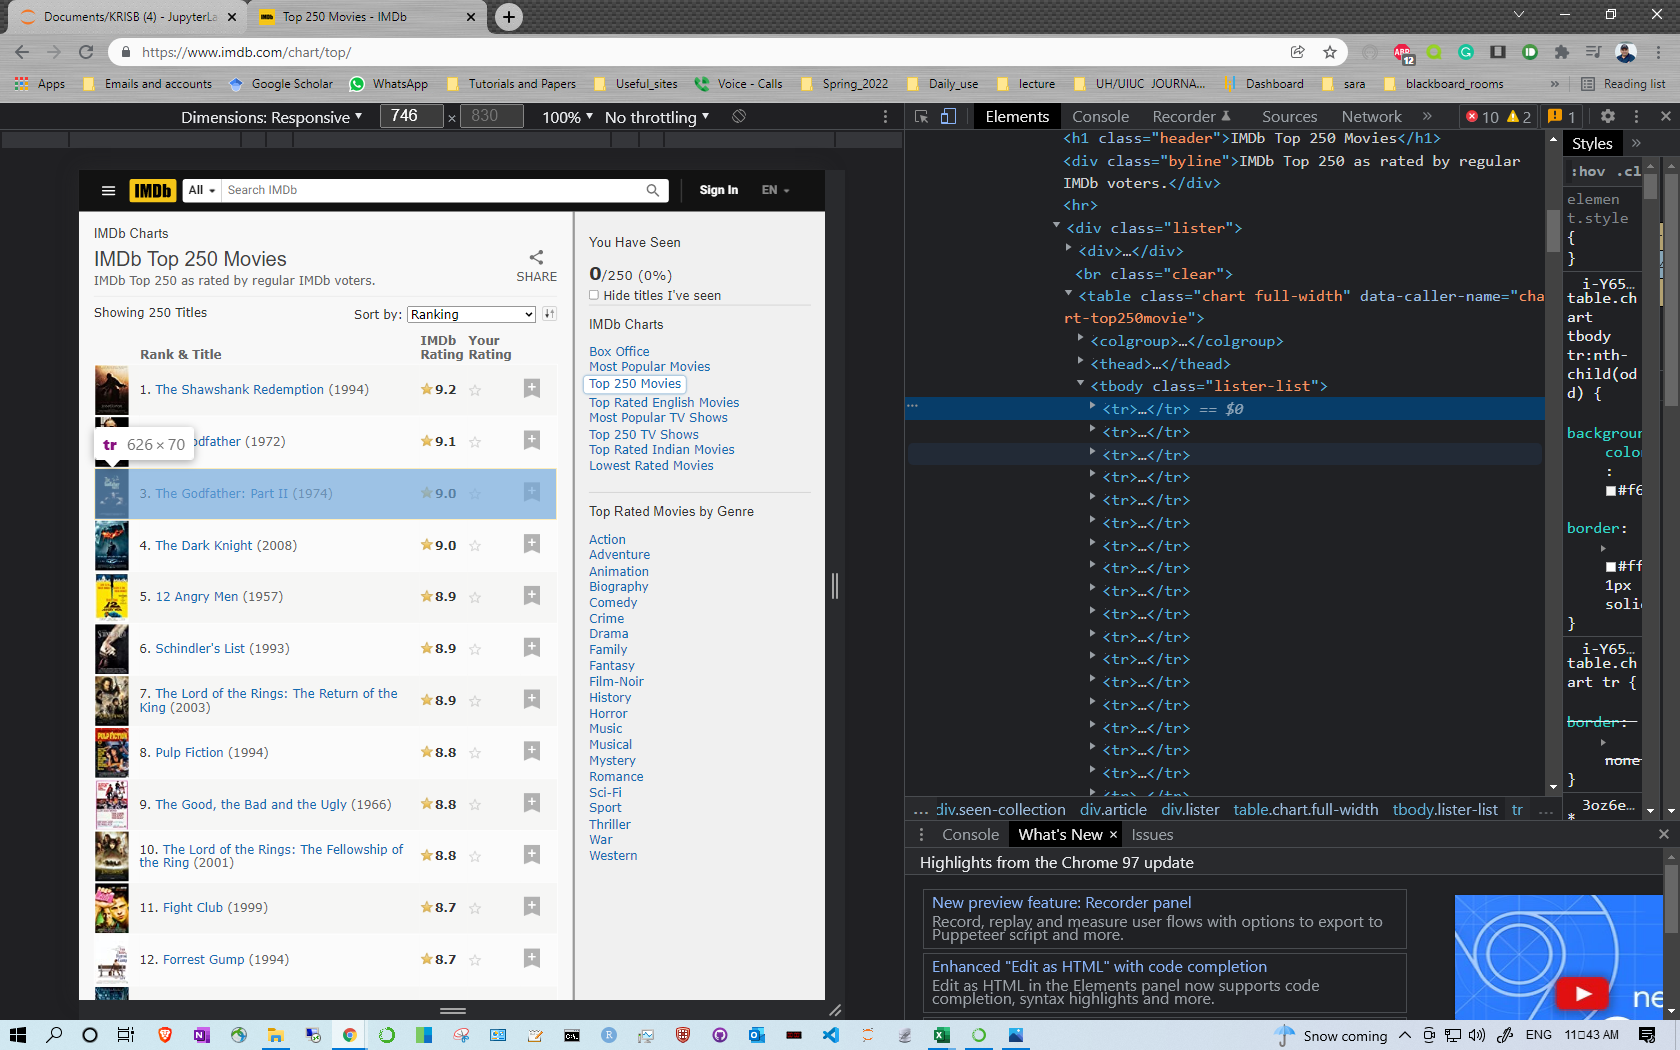

In [21]:
from IPython.display import Image
Image(filename='tr_tag.png')

so we extract <tr tag it gives 250 movies name. <tr tag is inside <tbody tag.
                                                                         
-- First we access <tbody tag

## *1. Extracting movie name*

In [22]:
from bs4 import BeautifulSoup
import requests

try:
    source = requests.get('https://www.imdb.com/chart/top/')
    source.raise_for_status() # if there is any error in link it shows error
    soup =BeautifulSoup(source.text,'html.parser')
    movies = soup.find('tbody', class_ = "lister-list").find_all('tr')
    #print(soup)
    #print(movies)
    # if there are multiple tbody tags use .find_all
except Exception as e:
    print(e)

## *2. Extracting from text inside tags*

In [23]:
from bs4 import BeautifulSoup
import requests

try:
    source = requests.get('https://www.imdb.com/chart/top/')
    source.raise_for_status() # if there is any error in link it shows error
    soup =BeautifulSoup(source.text,'html.parser')
    movies = soup.find('tbody', class_ = "lister-list").find_all('tr')
    for movie in movies:
        name = movie.find('td', class_ = "titleColumn").a
    print(name)
    #print(soup)
    #print(movies)
    # if there are multiple tbody tags use .find_all
except Exception as e:
    print(e)

<a href="/title/tt7019842/" title="C. Prem Kumar (dir.), Vijay Sethupathi, Adithya Bhaskar">96</a>


now find the text of a to get movie name

In [24]:
from bs4 import BeautifulSoup
import requests

try:
    source = requests.get('https://www.imdb.com/chart/top/')
    source.raise_for_status() # if there is any error in link it shows error
    soup =BeautifulSoup(source.text,'html.parser')
    movies = soup.find('tbody', class_ = "lister-list").find_all('tr')
    for movie in movies:
        name = movie.find('td', class_ = "titleColumn").a.text
        
        rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
        
        year = movie.find('td', class_="titleColumn").span.text.strip('()')
        
        rating = movie.find('td', class_ = "ratingColumn imdbRating").text.strip()
        
    print(rank,name,year,rating)
#     print(name)
#     print(year)
#     print(rating)
    
    
    #print(soup)
    #print(movies)
    # if there are multiple tbody tags use .find_all
except Exception as e:
    print(e)

250 96 2018 8.0


## *3.Showing into dataframe*

In [25]:
record = []
for movie in movies:
        name = movie.find('td', class_ = "titleColumn").a.text
        
        rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]
        
        year = movie.find('td', class_="titleColumn").span.text.strip('()')
        
        rating = movie.find('td', class_ = "ratingColumn imdbRating").text.strip()
        
        record.append((rank,name,year,rating))
    
import pandas as pd
pd.set_option('display.max_rows', 500)
df = pd.DataFrame(record, columns = ['Rank','Names','Year','Ratings'])
df.style.hide_index()

Rank,Names,Year,Ratings
1,The Shawshank Redemption,1994,9.2
2,The Godfather,1972,9.1
3,The Godfather: Part II,1974,9.0
4,The Dark Knight,2008,9.0
5,12 Angry Men,1957,8.9
6,Schindler's List,1993,8.9
7,The Lord of the Rings: The Return of the King,2003,8.9
8,Pulp Fiction,1994,8.8
9,"The Good, the Bad and the Ugly",1966,8.8
10,The Lord of the Rings: The Fellowship of the Ring,2001,8.8


## *4. Exporting into excel*

In [ ]:
#import openxyl as xls
#df.to_excel (r'export_dataframe.xlsx', index = False, header=True)

